In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import CSV File
df = pd.read_csv (r"D:\sales project\Superstore Sales Dataset.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
# General Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
# Filling Postal Code Null Values With 0
df['Postal Code'] = df['Postal Code'].fillna(0)

# Change Postal Code Data Type
df['Postal Code'] = df['Postal Code'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int32  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

df.describe()

# Data Cleaning

In [7]:
# Checking For Duplicates
if df.duplicated().sum() > 0:
    print('There Are Duplicates')
else:
    print ('There Is No Dulpicates')

There Is No Dulpicates


# Data Normalization

In [9]:
# Extract Customer Data Without Duplicates
customers = df[['Customer ID', 'Customer Name', 'Segment']].drop_duplicates()

In [10]:
# Discover Products duplicates
product_duplicates = df.groupby(['Product ID', 'Product Name']).size().reset_index(name='Count')
product_duplicates = product_duplicates[product_duplicates['Count'] > 1]

# Manage Duplicates
df['RowNum'] = df.groupby('Product ID').cumcount() + 1
df['Product_ID'] = df.apply(
    lambda row: f"{row['Product ID']}-{row['RowNum']}" if row['RowNum'] > 1 else row['Product ID'],
    axis=1
)

# Extract Product Data
products = df[['Product_ID', 'Category', 'Sub-Category', 'Product Name']].drop_duplicates()

In [11]:
# Extract Branches Data Without Duplicates
Branches = df[['Country','City','State','Postal Code','Region']].drop_duplicates()
# Add ID Column
Branches['Store_Branch_ID'] = range(1, len(Branches) + 1)

In [12]:
# Extract Ship Mode Data Without Duplicates
ship_modes = df[['Ship Mode']].drop_duplicates()
ship_modes['Ship_Mode_ID'] = range(1, len(ship_modes) + 1)

In [13]:
# Create Orders Table
orders = df.merge(
    Branches, 
    on=['Country', 'City', 'State', 'Postal Code', 'Region'], 
    how='left'
).merge(
    ship_modes, 
    on='Ship Mode', 
    how='left'
)

# Collect and Sum Sales for Each Order and Product
aggregated_sales = orders.groupby(['Order ID', 'Product_ID'])['Sales'].sum().reset_index()

# Create Final Orders Table
final_orders = orders[['Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Product_ID', 'Store_Branch_ID', 'Ship Mode']].drop_duplicates()

# Merge Aggregated Sales
final_orders = final_orders.merge(aggregated_sales, on=['Order ID', 'Product_ID'], how='left')

# Merge ship_modes to get Ship_Mode_ID
final_orders = final_orders.merge(ship_modes[['Ship Mode', 'Ship_Mode_ID']], on='Ship Mode', how='left')

# Convert Date Columns to Proper Format
final_orders['Order_Date'] = pd.to_datetime(final_orders['Order Date'], dayfirst=True).dt.date
final_orders['Ship_Date'] = pd.to_datetime(final_orders['Ship Date'], dayfirst=True).dt.date

# Drop Unnecessary Columns
final_orders.drop(columns=['Order Date', 'Ship Date', 'Ship Mode'], inplace=True)

# Display the new Orders table
print(final_orders.head())


         Order ID Customer ID       Product_ID  Store_Branch_ID     Sales  \
0  CA-2017-152156    CG-12520  FUR-BO-10001798                1  261.9600   
1  CA-2017-152156    CG-12520  FUR-CH-10000454                1  731.9400   
2  CA-2017-138688    DV-13045  OFF-LA-10000240                2   14.6200   
3  US-2016-108966    SO-20335  FUR-TA-10000577                3  957.5775   
4  US-2016-108966    SO-20335  OFF-ST-10000760                3   22.3680   

   Ship_Mode_ID  Order_Date   Ship_Date  
0             1  2017-11-08  2017-11-11  
1             1  2017-11-08  2017-11-11  
2             1  2017-06-12  2017-06-16  
3             2  2016-10-11  2016-10-18  
4             2  2016-10-11  2016-10-18  


In [14]:
print(final_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order ID         9800 non-null   object 
 1   Customer ID      9800 non-null   object 
 2   Product_ID       9800 non-null   object 
 3   Store_Branch_ID  9800 non-null   int64  
 4   Sales            9800 non-null   float64
 5   Ship_Mode_ID     9800 non-null   int64  
 6   Order_Date       9800 non-null   object 
 7   Ship_Date        9800 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 612.6+ KB
None


In [15]:
# Ensure 'Order_Date' and 'Ship_Date' are in datetime format before extracting date
final_orders['Order_Date'] = pd.to_datetime(final_orders['Order_Date'], dayfirst=True).dt.date
final_orders['Ship_Date'] = pd.to_datetime(final_orders['Ship_Date'], dayfirst=True).dt.date


In [16]:
# Export Data As CSV
customers.to_csv('customers.csv', index=False)
Branches.to_csv('store_branches.csv', index=False)
ship_modes.to_csv('ship_modes.csv', index=False)
products.to_csv('products.csv', index=False)
final_orders.to_csv('orders.csv', index=False)

In [17]:
# Download Data
customers.to_csv(r'D:/sales project/Sales Project By Python/customers.csv', index=False)
Branches.to_csv(r'D:/sales project/Sales Project By Python/store_branches.csv', index=False)
ship_modes.to_csv(r'D:/sales project/Sales Project By Python/ship_modes.csv', index=False)
products.to_csv(r'D:/sales project/Sales Project By Python/products.csv', index=False)
final_orders.to_csv(r'D:/sales project/Sales Project By Python/orders.csv', index=False)


# Analysis Questions

## 1️⃣ Setup & Data Loading

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load dataset (Replace 'store_sales.csv' with your actual file)
df = pd.read_csv("Superstore Sales Dataset.csv", parse_dates=["Order Date", "Ship Date"])

# Display first few rows
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## 2️⃣ Sales Performance Analysis

### Total Sales Over Time (Daily, Monthly, Yearly)

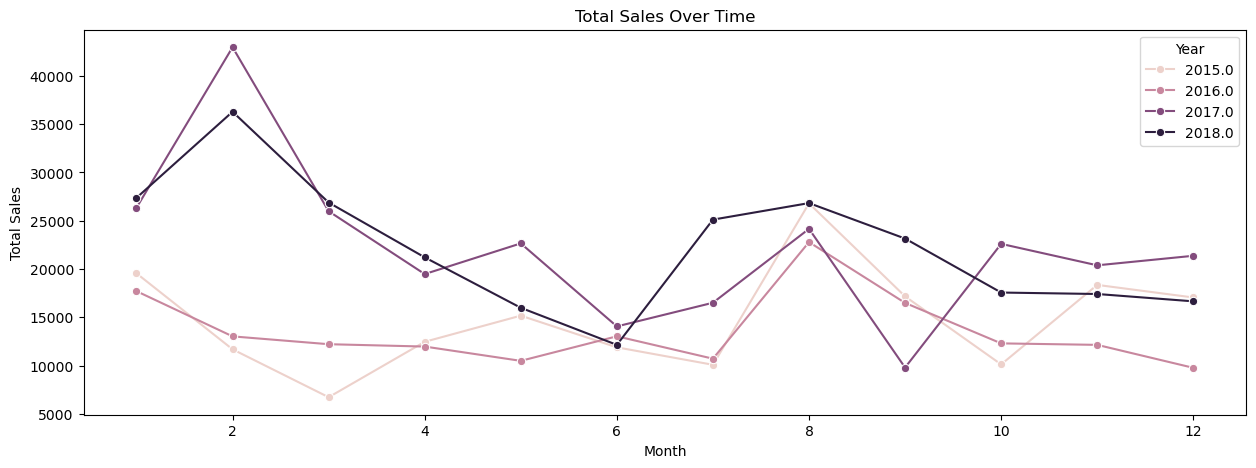

In [23]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Group by Year and Month
sales_over_time = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(15, 5))
sns.lineplot(data=sales_over_time, x='Month', y='Sales', hue='Year', marker='o')
plt.title("Total Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend(title="Year")
plt.show()


### Top-Selling Products by Revenue

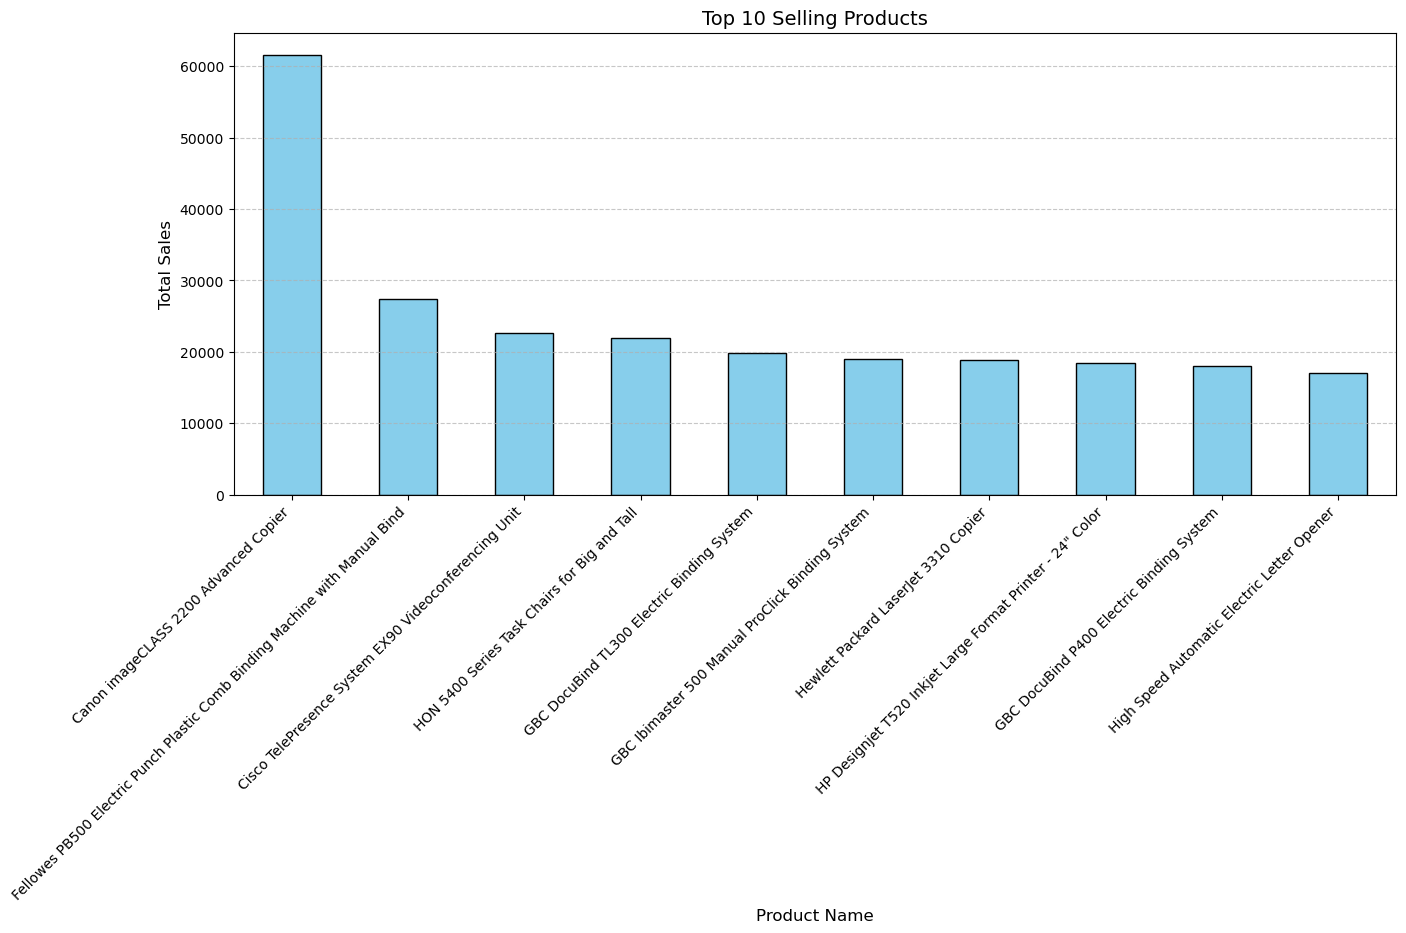

In [25]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(15, 6))
top_products.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Top 10 Selling Products", fontsize=14)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### Best-Performing Store Branches by Sales

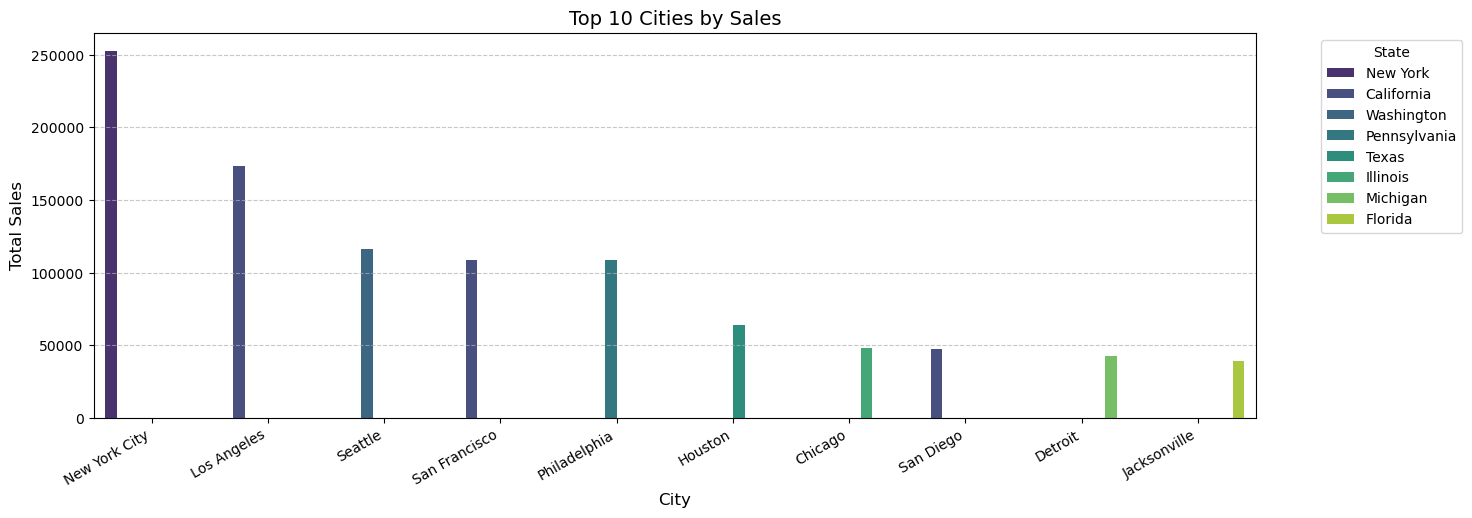

In [27]:
top_branches = df.groupby(['City', 'State'])['Sales'].sum().reset_index()
top_branches = top_branches.sort_values(by="Sales", ascending=False).head(10)  # Select top 10 cities

plt.figure(figsize=(15, 5))
sns.barplot(data=top_branches, x="City", y="Sales", hue="State", dodge=True, palette="viridis")

plt.xticks(rotation=30, ha='right')  # Rotate less
plt.title("Top 10 Cities by Sales", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend to the side
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


## 3️⃣ Customer Insights

### Top Customers Based on Purchases

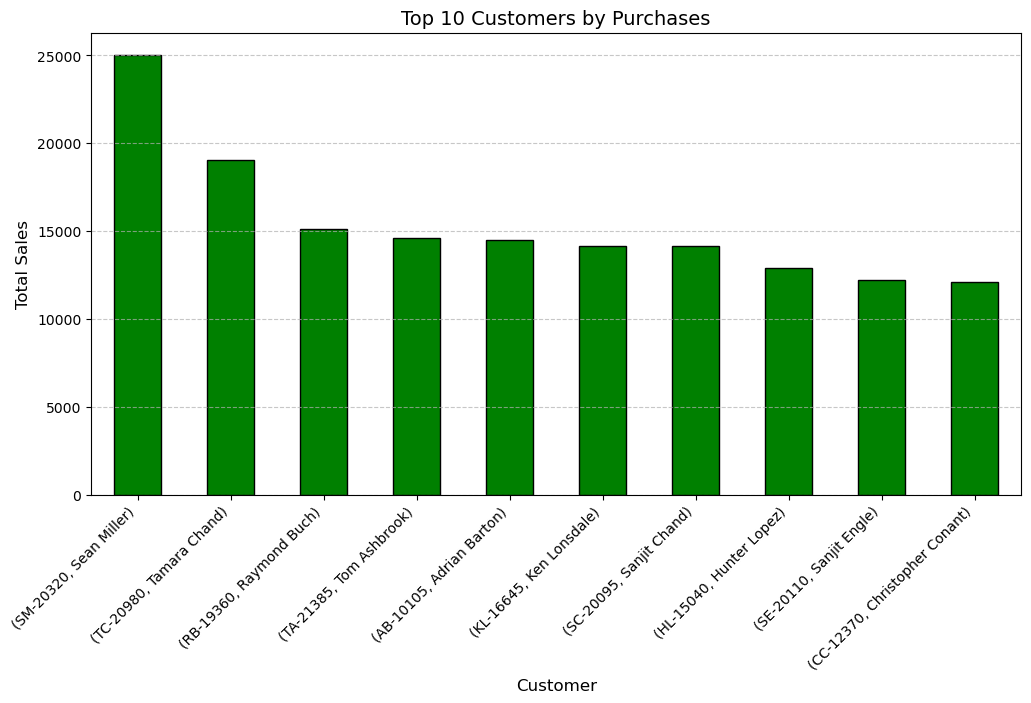

In [30]:
top_customers = df.groupby(['Customer ID', 'Customer Name'])['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_customers.plot(kind='bar', color='green', edgecolor='black')

plt.title("Top 10 Customers by Purchases", fontsize=14)
plt.xlabel("Customer", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Ensure proper label visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Customer Retention (Repeat Customers)

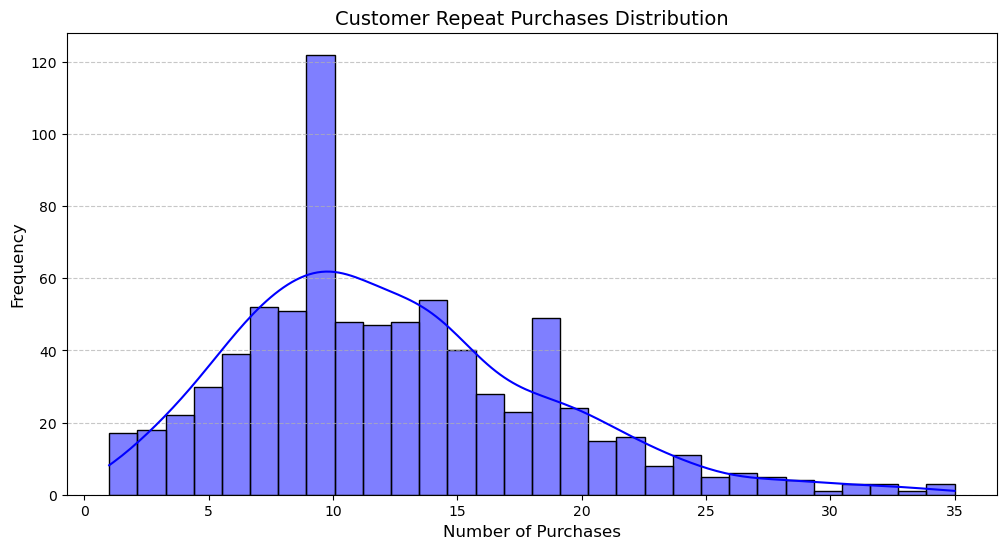

In [32]:
repeat_customers = df['Customer ID'].value_counts().reset_index()
repeat_customers.columns = ['Customer ID', 'Purchase_Count']

plt.figure(figsize=(12, 6))
sns.histplot(repeat_customers['Purchase_Count'], bins=30, kde=True, color='blue')

plt.title("Customer Repeat Purchases Distribution", fontsize=14)
plt.xlabel("Number of Purchases", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## 4️⃣ Product & Category Insights

### Best-Selling Categories

C:\Users\Aboelyazzed\AppData\Local\Temp\ipykernel_23368\902026455.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=category_sales, x="Category", y="Sales", palette="Blues", edgecolor="black")


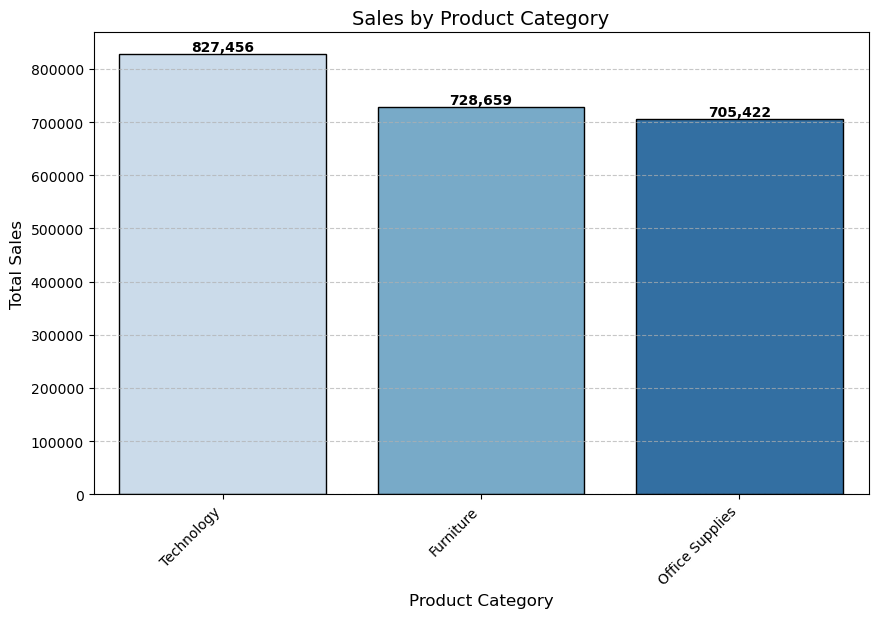

In [35]:
category_sales = df.groupby(['Category'])['Sales'].sum().reset_index()
category_sales = category_sales.sort_values(by="Sales", ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=category_sales, x="Category", y="Sales", palette="Blues", edgecolor="black")

plt.title("Sales by Product Category", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)

# Add value labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.xticks(rotation=45, ha='right')  # Rotate for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## 5️⃣ Shipping & Delivery Insights

### Average Shipping Time

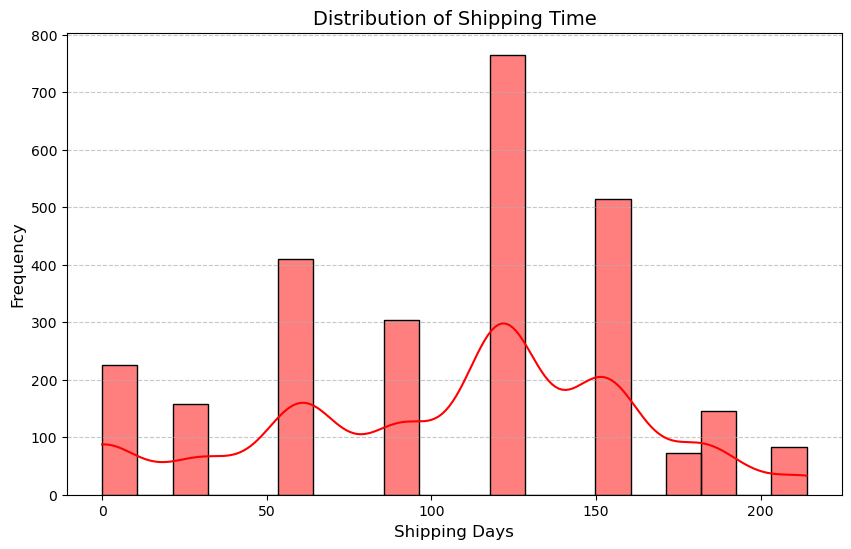

In [38]:

# Convert to datetime
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Ensure the DataFrame is not a slice
df = df.copy()

# Calculate Shipping Days
df.loc[:, 'Shipping_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Shipping_Days'], bins=20, kde=True, color='red', edgecolor="black")

plt.title("Distribution of Shipping Time", fontsize=14)
plt.xlabel("Shipping Days", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Most Used Shipping Modes

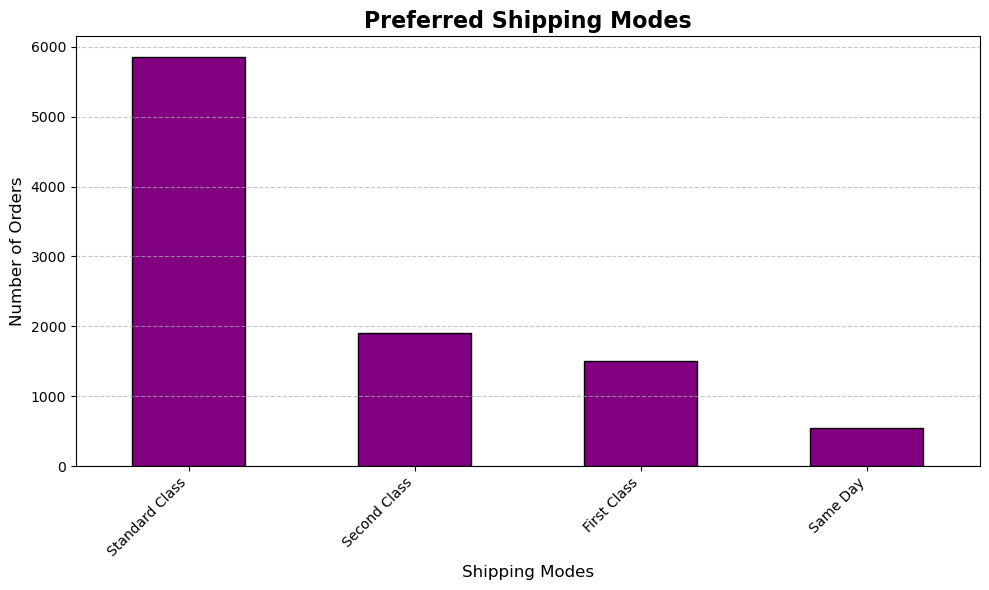

In [40]:
# Count the shipping modes
shipping_modes = df['Ship Mode'].value_counts()

# Create a figure with improved size and layout
plt.figure(figsize=(10, 6))

# Plot a bar chart with customizations
shipping_modes.plot(kind='bar', color='purple', edgecolor='black')

# Add a title with improved font size and style
plt.title("Preferred Shipping Modes", fontsize=16, fontweight='bold')

# Label the y-axis
plt.ylabel("Number of Orders", fontsize=12)

# Label the x-axis with improved font size
plt.xlabel("Shipping Modes", fontsize=12)

# Rotate x-axis labels for better readability and set alignment
plt.xticks(rotation=45, ha='right')

# Add grid lines to make the chart easier to interpret
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

## 6️⃣ Sales Forecasting with Machine Learning

### We will use Linear Regression to predict future sales.

Mean Absolute Error: 228.4143384228723
Predicted Sales for April 1, 2025: 176.79


C:\Users\Aboelyazzed\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


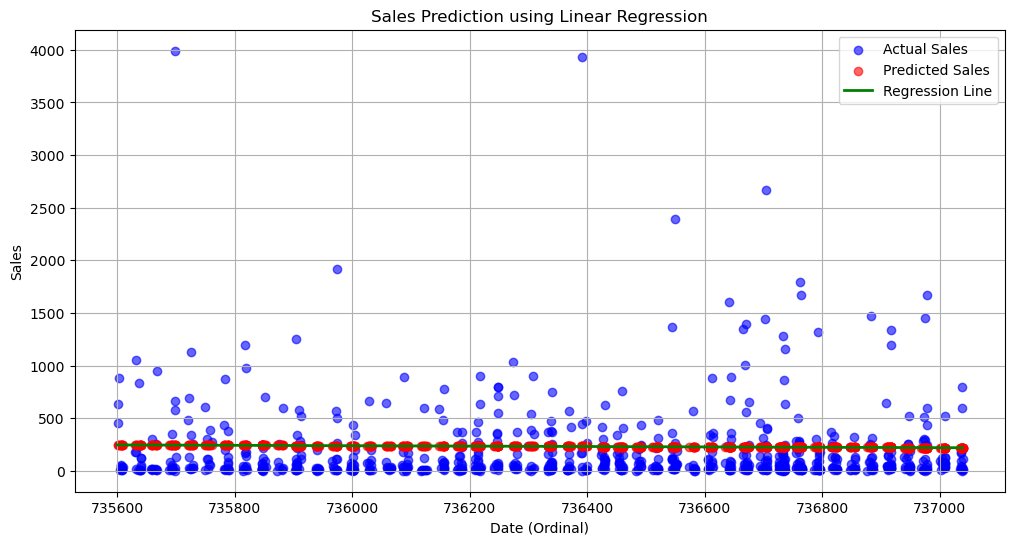

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from datetime import datetime

# Ensure 'Order Date' is in datetime format (handle invalid dates)
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Drop rows where 'Order Date' is invalid (NaT)
df = df.dropna(subset=['Order Date'])

# Convert 'Order Date' to ordinal values (now safe without NaT)
df['Date_Ordinal'] = df['Order Date'].apply(lambda x: x.toordinal())

# Prepare features (X) and target variable (y)
X = df[['Date_Ordinal']]
y = df['Sales']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on Test Set
y_pred = model.predict(X_test)

# Evaluate Model Performance (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Predict Sales for April 2025 (next month)
future_date = datetime(2025, 4, 1)
future_ordinal = future_date.toordinal()
future_sales = model.predict([[future_ordinal]])
print(f"Predicted Sales for April 1, 2025: {future_sales[0]:.2f}")

# Visualize the Model's Performance (sorted for better line clarity)
plt.figure(figsize=(12, 6))

# Sort values for better visualization
sorted_indices = X_train['Date_Ordinal'].sort_values().index
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual Sales')
plt.scatter(X_test, y_pred, color='red', alpha=0.6, label='Predicted Sales')
plt.plot(X_train.sort_values(by='Date_Ordinal'), 
         model.predict(X_train.sort_values(by='Date_Ordinal')), 
         color='green', linewidth=2, label='Regression Line')

plt.title("Sales Prediction using Linear Regression")
plt.xlabel("Date (Ordinal)")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()